In [1]:
# Add the parent directory to path to import uuv_mission module
import sys
sys.path.insert(0, '..')

In [2]:
# Import required modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController
import numpy as np

print("Modules imported successfully!")

Modules imported successfully!


# Test 1: Simulate with random mission

First, let's test the PD controller with a randomly generated mission.

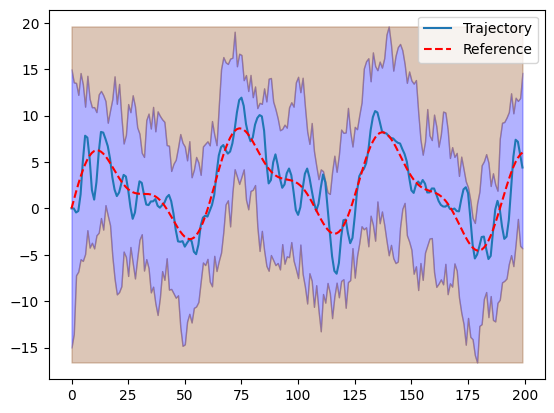

In [4]:
# Create a random mission
mission = Mission.random_mission(duration=200, scale=5.0)

# Create submarine and PD controller
sub = Submarine()
controller = PDController(kp=0.15, kd=0.6)

# Create closed-loop system
closed_loop = ClosedLoop(sub, controller)

# Simulate with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)

# Plot the results
trajectory.plot_completed_mission(mission)

# Test 2: Load mission from CSV

If you have a mission saved as CSV (e.g., data/mission.csv), you can load and test it.

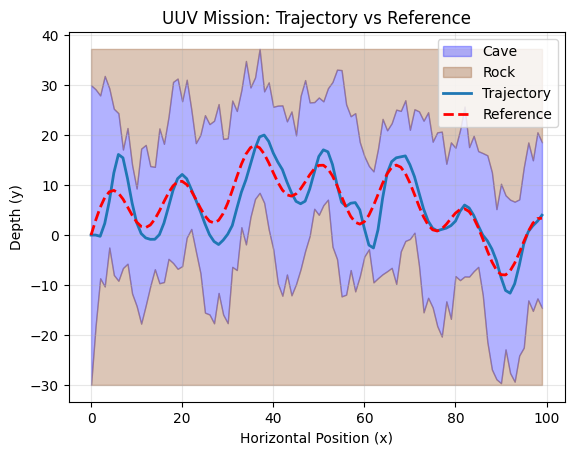

In [3]:
# Uncomment to test with CSV mission
mission_csv = Mission.from_csv("../data/mission.csv")
sub2 = Submarine()
controller2 = PDController(kp=0.15, kd=0.6)
closed_loop2 = ClosedLoop(sub2, controller2)
trajectory2 = closed_loop2.simulate_with_random_disturbances(mission_csv, variance=0.5)
trajectory2.plot_completed_mission(mission_csv)

# Test 3: Experiment with different controller gains

Try adjusting KP and KD to see how they affect performance. Higher KP increases responsiveness but may cause overshoot. Higher KD provides damping and reduces oscillations.


Testing with KP=0.1, KD=0.5
Plotting trajectory with KP=0.1, KD=0.5


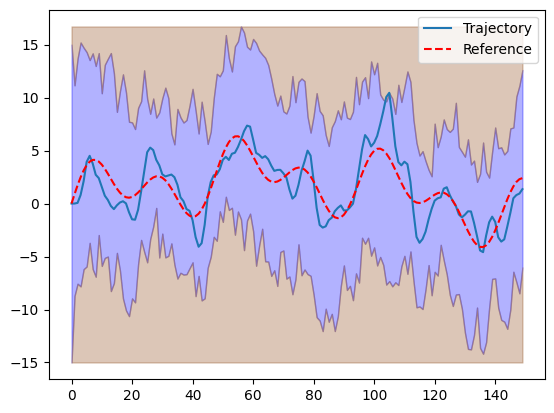


Testing with KP=0.15, KD=0.6
Plotting trajectory with KP=0.15, KD=0.6


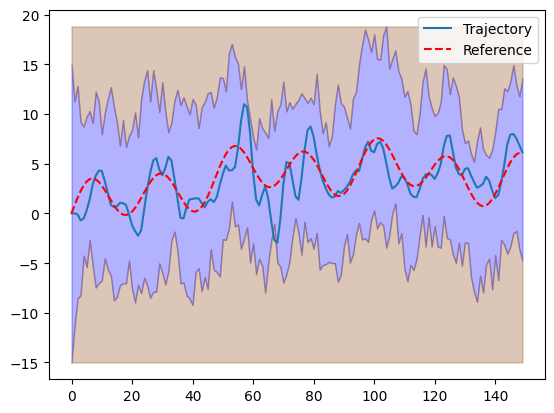


Testing with KP=0.2, KD=0.7
Plotting trajectory with KP=0.2, KD=0.7


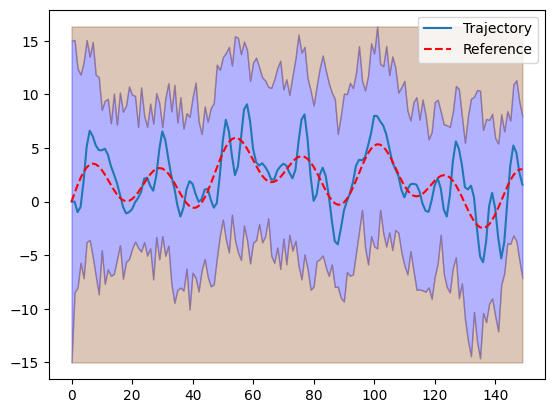

In [6]:
# Test different gain combinations
test_gains = [
    (0.10, 0.5),  # Lower proportional gain
    (0.15, 0.6),  # Default gains
    (0.20, 0.7),  # Higher gains
]

for kp, kd in test_gains:
    print(f"\nTesting with KP={kp}, KD={kd}")
    
    # Create new mission and controller for each test
    test_mission = Mission.random_mission(duration=150, scale=5.0)
    test_sub = Submarine()
    test_controller = PDController(kp=kp, kd=kd)
    test_closed_loop = ClosedLoop(test_sub, test_controller)
    
    # Simulate
    test_trajectory = test_closed_loop.simulate_with_random_disturbances(test_mission, variance=0.5)
    
    # Plot
    print(f"Plotting trajectory with KP={kp}, KD={kd}")
    test_trajectory.plot_completed_mission(test_mission)